In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
Master_ds = pd.read_excel(r"C:\Users\jakey\Data_science_today's_world_miterm\Data_set\Master_Datasets.xlsx")
Customer_master_sheet = pd.read_excel(r"C:\Users\jakey\Data_science_today's_world_miterm\Data_set\Master_Datasets.xlsx", sheet_name= 'Customer Master')
Scenario4_ds = pd.read_excel(r"C:\Users\jakey\Data_science_today's_world_miterm\Data_set\Scenario4_Data.xlsx")
Store_master_sheet = pd.read_excel(r"C:\Users\jakey\Data_science_today's_world_miterm\Data_set\Master_Datasets.xlsx", sheet_name= 'Store Master')

In [3]:
Scenario4_ds.info()

NameError: name 'Scenario4_ds' is not defined

In [ ]:
Scenario4_ds['date'] = pd.to_datetime(Scenario4_ds['date'])

Scenario4_ds['month'] = Scenario4_ds['date'].dt.month

Scenario4_ds.head()
Scenario4_ds_month = Scenario4_ds[Scenario4_ds['month'].isin([10, 11, 12])].copy()

del Scenario4_ds_month['date']

Scenario4_ds_month.head()

,transaction_id,store_id,customer_id,item_id,selling_price,units_sold,month
161227,985080,1048,900233,10040,41.56,1,10
161228,532288,1045,900154,10001,37.61,2,10
161229,720348,1024,900320,10031,15.16,3,10
161230,609309,1029,900202,10012,34.20,3,10
161231,171847,1007,900498,10026,30.27,1,10


In [ ]:
Scenario4_ds.head()

,transaction_id,date,store_id,customer_id,item_id,selling_price,units_sold,month
0,924485,2024-01-01,1004,900193,10023,29.85,1,1
1,136000,2024-01-01,1005,900410,10001,72.28,3,1
2,823688,2024-01-01,1037,900031,10038,51.45,1,1
3,171735,2024-01-01,1026,900068,10025,18.91,1,1
4,130756,2024-01-01,1026,900010,10042,16.12,2,1


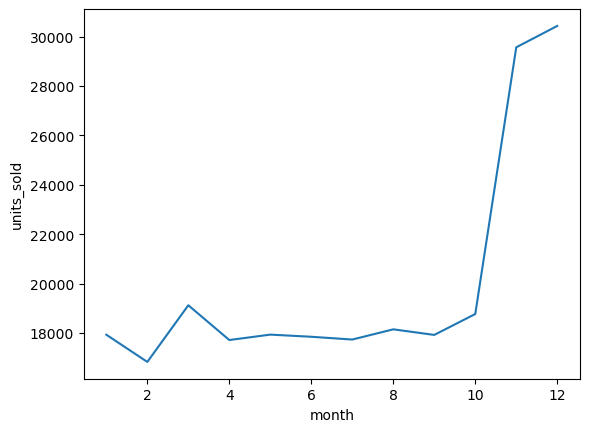

In [ ]:
Scenario4_ds_gby = Scenario4_ds.groupby('month')['units_sold'].agg('size').reset_index(name ='units_sold')

sns.lineplot(data = Scenario4_ds_gby, x = 'month',y = 'units_sold')
plt.ylabel = 'month'
plt.show()

In [ ]:
problem_4 = Scenario4_ds.merge(Customer_master_sheet, on = 'customer_id', how = 'inner').copy()
problem_4['posted_month'] = problem_4['date'].dt.strftime('%B')
problem_4['Revenue'] = problem_4['units_sold'] * problem_4['selling_price']
problem_4

,transaction_id,date,store_id,customer_id,item_id,selling_price,units_sold,month,loyalty,age,Income,posted_month,Revenue
0,924485,2024-01-01,1004,900193,10023,29.85,1,1,95.4,49,472475,January,29.85
1,136000,2024-01-01,1005,900410,10001,72.28,3,1,87.6,76,492549,January,216.84
2,823688,2024-01-01,1037,900031,10038,51.45,1,1,4.6,38,404903,January,51.45
3,171735,2024-01-01,1026,900068,10025,18.91,1,1,35.8,62,222486,January,18.91
4,130756,2024-01-01,1026,900010,10042,16.12,2,1,15.2,79,496831,January,32.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,873960,2024-12-31,1048,900052,10033,42.42,1,12,21.4,56,468244,December,42.42
239996,217256,2024-12-31,1013,900158,10030,51.64,2,12,67.7,77,348982,December,103.28
239997,894095,2024-12-31,1024,900256,10030,30.79,2,12,69.3,18,329212,December,61.58
239998,804233,2024-12-31,1013,900081,10040,47.06,2,12,44.3,45,313857,December,94.12


In [ ]:
income_label = ['Low', 'Middle','Upper_Middle', 'High']
income_level = [0, 50000, 100000, 150000, float('inf')]
#problem_4['income_level'] = pd.qcut(problem_4['Income'].astype(float), q=4, labels=income_label)
problem_4['income_level'] = pd.cut(problem_4['Income'].astype(float), bins = income_level, labels = income_label, right = False)
problem_4_campaign = problem_4[problem_4['month'].isin([10,11,12])]

loylty_level = [0, 33, 66, 100]
loylty_label = ['Low', 'Normal', 'High']

problem_4['Loyalty_level'] = pd.cut(problem_4['loyalty'], bins = loylty_level, labels= loylty_label, right = True)
problem_4.drop(columns= 'Loylty_level', inplace= True)
problem_4

,transaction_id,date,store_id,customer_id,item_id,selling_price,units_sold,month,loyalty,age,Income,posted_month,Revenue,income_level,age_group,Loyalty_level
0,924485,2024-01-01,1004,900193,10023,29.85,1,1,95.4,49,472475,January,29.85,High,Middle_age,High
1,136000,2024-01-01,1005,900410,10001,72.28,3,1,87.6,76,492549,January,216.84,High,Old,High
2,823688,2024-01-01,1037,900031,10038,51.45,1,1,4.6,38,404903,January,51.45,High,Middle_age,Low
3,171735,2024-01-01,1026,900068,10025,18.91,1,1,35.8,62,222486,January,18.91,High,Old,Normal
4,130756,2024-01-01,1026,900010,10042,16.12,2,1,15.2,79,496831,January,32.24,High,Old,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,873960,2024-12-31,1048,900052,10033,42.42,1,12,21.4,56,468244,December,42.42,High,Middle_age,Low
239996,217256,2024-12-31,1013,900158,10030,51.64,2,12,67.7,77,348982,December,103.28,High,Old,High
239997,894095,2024-12-31,1024,900256,10030,30.79,2,12,69.3,18,329212,December,61.58,High,Young,High
239998,804233,2024-12-31,1013,900081,10040,47.06,2,12,44.3,45,313857,December,94.12,High,Middle_age,Normal


In [ ]:
problem_4_Income_gby = problem_4.groupby(['posted_month','income_level'])['units_sold'].sum().reset_index(name='units_sold')
problem_4_Income_gby['month_no'] = pd.to_datetime(problem_4_Income_gby['posted_month'], format='%B').dt.month
# problem_4_Income_gby['posted_month'] = pd.Categorical(problem_4_Income_gby['posted_month'], categories = ['October', 'November', 'December'], ordered = True)
problem_4_Income_gby = problem_4_Income_gby.sort_values(['month_no'])
problem_4_Income_gby

C:\Users\jakey\AppData\Local\Temp\ipykernel_2356\2614693724.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  problem_4_Income_gby = problem_4.groupby(['posted_month','income_level'])['units_sold'].sum().reset_index(name='units_sold')


,posted_month,income_level,units_sold,month_no
19,January,High,26900,1
18,January,Upper_Middle,3625,1
17,January,Middle,4316,1
16,January,Low,1195,1
15,February,High,24978,2
14,February,Upper_Middle,3525,2
13,February,Middle,4106,2
12,February,Low,1193,2
28,March,Low,1146,3
31,March,High,28300,3


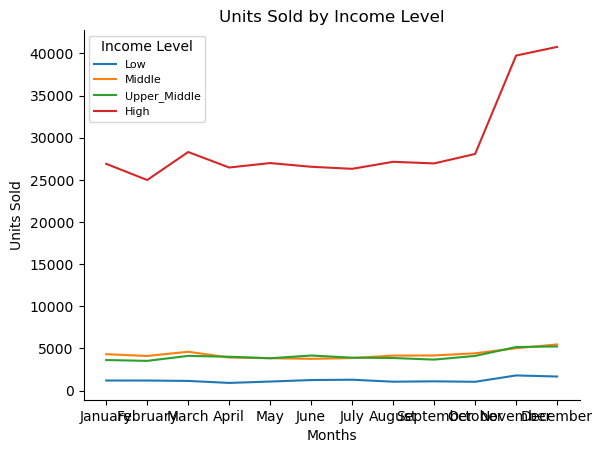

In [ ]:

ax = sns.lineplot(data = problem_4_Income_gby, x = 'posted_month', y = 'units_sold', hue = 'income_level')
ax.set_xlabel('Months')
ax.set_ylabel('Units Sold')
ax.set_title('Units Sold by Income Level')
ax.legend(title = 'Income Level', prop = {'size': 8})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

C:\Users\jakey\AppData\Local\Temp\ipykernel_2356\3792160198.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  problem_4_Income_gby2 = problem_4.groupby(['posted_month','income_level'])['units_sold'].size().reset_index(name='units_sold')


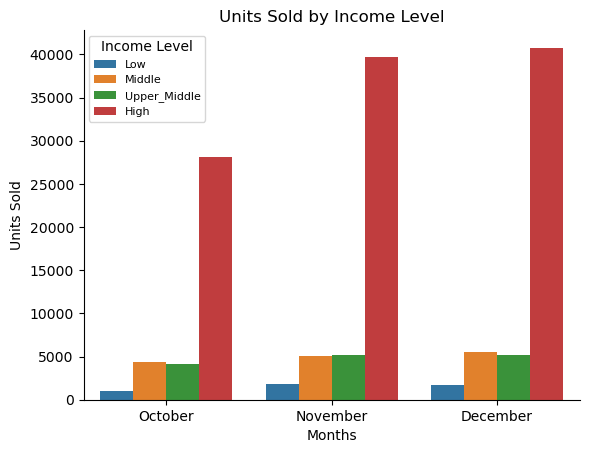

In [ ]:
problem_4_Income_gby2 = problem_4.groupby(['posted_month','income_level'])['units_sold'].size().reset_index(name='units_sold')
problem_4_Income_gby2['posted_month'] = pd.Categorical(problem_4_Income_gby['posted_month'], categories = ['October', 'November', 'December'], ordered = True)
problem_4_Income_gby = problem_4_Income_gby.sort_values(['posted_month', 'income_level'])
problem_4_Income_gby['posted_month'] = pd.Categorical(problem_4_Income_gby['posted_month'], categories = ['October', 'November', 'December'], ordered = True)


ax = sns.barplot(data = problem_4_Income_gby, x = 'posted_month', y = 'units_sold', hue = 'income_level')
ax.set_xlabel('Months')
ax.set_ylabel('Units Sold')
ax.set_title('Units Sold by Income Level')
ax.legend(title = 'Income Level', prop = {'size': 8})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [ ]:
problem_4_money_gby = problem_4.groupby(['posted_month','income_level'])['Revenue'].sum().reset_index(name='Revenue')
problem_4_money_gby['month_no'] = pd.to_datetime(problem_4_money_gby['posted_month'], format='%B').dt.month
# problem_4_money_gby['posted_month'] = pd.Categorical(problem_4_money_gby['posted_month'], categories = ['October', 'November', 'December'], ordered = True)
problem_4_money_gby = problem_4_money_gby.sort_values(['month_no'])
problem_4_money_gby

C:\Users\jakey\AppData\Local\Temp\ipykernel_2356\1555451394.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  problem_4_money_gby = problem_4.groupby(['posted_month','income_level'])['Revenue'].sum().reset_index(name='Revenue')


,posted_month,income_level,Revenue,month_no
19,January,High,1024956.00,1
18,January,Upper_Middle,135143.12,1
17,January,Middle,163876.58,1
16,January,Low,45433.93,1
15,February,High,942778.77,2
14,February,Upper_Middle,129057.10,2
13,February,Middle,155679.06,2
12,February,Low,44332.09,2
28,March,Low,43704.70,3
31,March,High,1074933.67,3


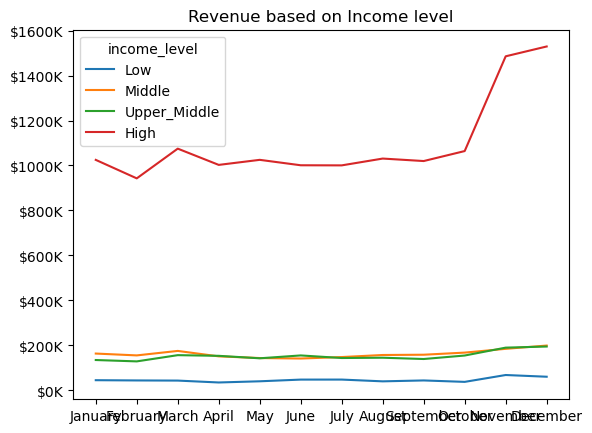

In [ ]:

sns.lineplot(data = problem_4_money_gby, x = 'posted_month', y = 'Revenue', hue = 'income_level')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax.set_title('Revenue based on Income level')
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

In [ ]:
problem_4

,transaction_id,date,store_id,customer_id,item_id,selling_price,units_sold,month,loyalty,age,Income,posted_month,Revenue,income_level,age_group,Loyalty_level
0,924485,2024-01-01,1004,900193,10023,29.85,1,1,95.4,49,472475,January,29.85,High,Middle_age,High
1,136000,2024-01-01,1005,900410,10001,72.28,3,1,87.6,76,492549,January,216.84,High,Old,High
2,823688,2024-01-01,1037,900031,10038,51.45,1,1,4.6,38,404903,January,51.45,High,Middle_age,Low
3,171735,2024-01-01,1026,900068,10025,18.91,1,1,35.8,62,222486,January,18.91,High,Old,Normal
4,130756,2024-01-01,1026,900010,10042,16.12,2,1,15.2,79,496831,January,32.24,High,Old,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,873960,2024-12-31,1048,900052,10033,42.42,1,12,21.4,56,468244,December,42.42,High,Middle_age,Low
239996,217256,2024-12-31,1013,900158,10030,51.64,2,12,67.7,77,348982,December,103.28,High,Old,High
239997,894095,2024-12-31,1024,900256,10030,30.79,2,12,69.3,18,329212,December,61.58,High,Young,High
239998,804233,2024-12-31,1013,900081,10040,47.06,2,12,44.3,45,313857,December,94.12,High,Middle_age,Normal


In [ ]:
problem_4
labels = ['Young', 'Middle_age', 'Old']
age_level = [0, 30, 60, float('inf')]

problem_4['age_group'] = pd.cut(problem_4['age'], bins = age_level, labels = labels, right = True)

problem_4_age = problem_4.groupby(['posted_month', 'age_group'])['units_sold'].sum().reset_index()

problem_4_age['month_no'] = pd.to_datetime(problem_4_age['posted_month'], format='%B').dt.month

problem_4_age.sort_values('month_no', inplace= True)


problem_4_age


C:\Users\jakey\AppData\Local\Temp\ipykernel_2356\1748402493.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  problem_4_age = problem_4.groupby(['posted_month', 'age_group'])['units_sold'].sum().reset_index()


,posted_month,age_group,units_sold,month_no
14,January,Old,13713,1
13,January,Middle_age,14684,1
12,January,Young,7639,1
11,February,Old,12017,2
10,February,Middle_age,14364,2
9,February,Young,7421,2
21,March,Young,8080,3
23,March,Old,14436,3
22,March,Middle_age,15651,3
0,April,Young,7677,4


<Axes: xlabel='posted_month', ylabel='units_sold'>

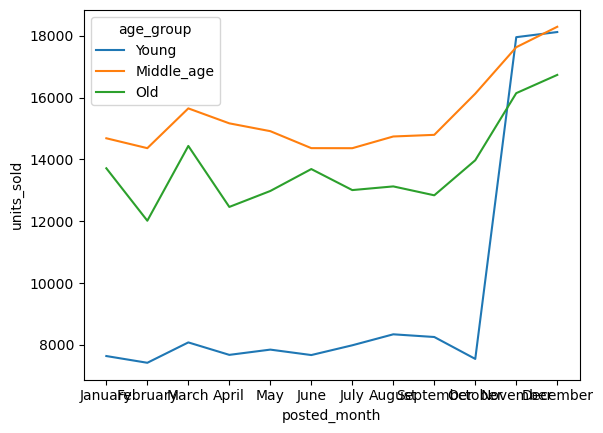

In [ ]:
sns.lineplot(data = problem_4_age, x = 'posted_month', y = 'units_sold', hue = 'age_group')

C:\Users\jakey\AppData\Local\Temp\ipykernel_2356\1699850839.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  problem_4_age = problem_4.groupby(['posted_month', 'age_group'])['units_sold'].count().reset_index()


Text(0, 0.5, '')

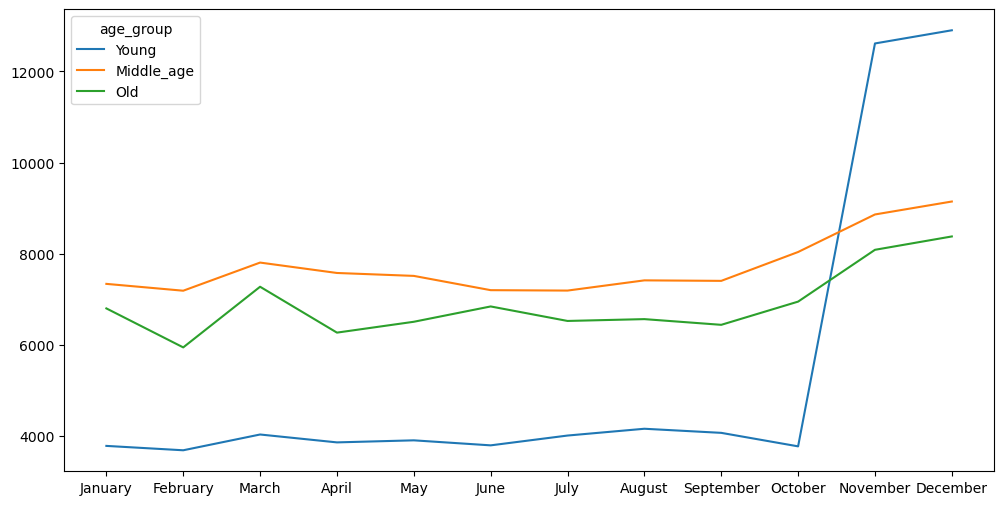

In [ ]:
problem_4
labels = ['Young', 'Middle_age', 'Old']
age_level = [0, 30, 60, float('inf')]

problem_4['age_group'] = pd.cut(problem_4['age'], bins = age_level, labels = labels, right = True)

problem_4_age = problem_4.groupby(['posted_month', 'age_group'])['units_sold'].count().reset_index()

problem_4_age['month_no'] = pd.to_datetime(problem_4_age['posted_month'], format='%B').dt.month

problem_4_age.sort_values('month_no', inplace= True)


plt.figure(figsize= (12, 6))

ax = plt.gca()
sns.lineplot(data = problem_4_age, x = 'posted_month', y = 'units_sold', hue = 'age_group')
ax.set_xlabel('')
ax.set_ylabel('')

The Young segment:

not only bought more items overall but also greatly increased how often they made purchases, suggesting the campaign strongly resonated with them, motivating more frequent visits or interactions.

Middle_age and Old groups:

responded positively but were comparatively less engaged, particularly in terms of transaction frequency.


In [ ]:
revenue_age_group = problem_4.groupby(['posted_month','age_group'])['Revenue'].sum().reset_index()


C:\Users\jakey\AppData\Local\Temp\ipykernel_2356\1539432701.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_age_group = problem_4.groupby(['posted_month','age_group'])['Revenue'].sum().reset_index()
